# Ada Boost

- Everythig is same as Random Forest except the model initilaization cell ([10] here)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../datasets/Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 6)

In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Species'] = label_encoder.fit_transform(df['Species'])
df['Species'].unique()

array([0, 1, 2])

In [7]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=57)

In [9]:
print(label_encoder.classes_)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [10]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=3, random_state=42)

In [11]:
clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=3, random_state=42)

In [12]:
y_pred = clf.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
cm

Accuracy: 0.9736842105263158


array([[13,  1,  0],
       [ 0,  9,  0],
       [ 0,  0, 15]])

In [14]:
y_pred

array([2, 2, 1, 1, 0, 1, 0, 2, 1, 0, 1, 0, 0, 0, 1, 2, 1, 0, 0, 2, 2, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 0, 0, 1, 2, 0, 1])

In [15]:
label_encoder.inverse_transform(y_pred)

array(['Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor'], dtype=object)

In [16]:
target_names = label_encoder.classes_
print(classification_report(y_test, y_pred, target_names=target_names))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.93      0.96        14
Iris-versicolor       0.90      1.00      0.95         9
 Iris-virginica       1.00      1.00      1.00        15

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



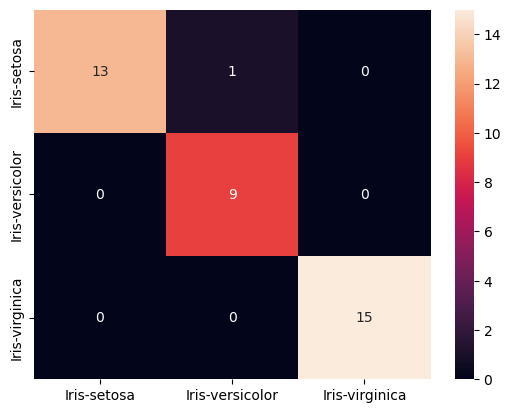

In [17]:
cm_df = pd.DataFrame(cm, 
                     index = target_names,
                     columns = target_names)

sns.heatmap(cm_df, annot=True)
plt.show()

In [18]:
from sklearn.model_selection import cross_val_score, LeaveOneOut

scores = cross_val_score(clf, X, y, cv = LeaveOneOut())
# print(scores)

scores.mean()*100

99.33333333333333